In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import zscore
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import Lasso
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [4]:
# Value counts for each feature data
for i in df.columns:
    print(df[i].value_counts())
    print("no of unique values",df[i].nunique())
    print('*****************')

IND    907
Name: country, dtype: int64
no of unique values 1
*****************
India    907
Name: country_long, dtype: int64
no of unique values 1
*****************
ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64
no of unique values 907
*****************
WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64
no of unique values 907
*****************
5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, 

### Checking for null values

In [5]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

#### Removing columns with single unique value and empty columns

In [6]:
for i in df.columns:
    if df[i].nunique()==0:
        print(i)
    elif df[i].nunique()==1:
        print(i)
    else:
        continue

country
country_long
other_fuel2
other_fuel3
wepp_id
year_of_capacity_data
generation_gwh_2013
generation_gwh_2019
generation_data_source
estimated_generation_gwh


In [7]:
df1=df.drop(["country",
"country_long",
"other_fuel2",
"other_fuel3",
"wepp_id",
"year_of_capacity_data",
"generation_gwh_2013",
"generation_gwh_2019",
"generation_data_source",
"estimated_generation_gwh"], axis=1)

In [8]:
df1.isnull().sum()

name                     0
gppd_idnr                0
capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
owner                  565
source                   0
url                      0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

### Filling null values

In [9]:
df1['other_fuel1'].fillna(df['other_fuel1'].mode()[0], inplace=True)
df1['geolocation_source'].fillna(df1['geolocation_source'].mode()[0], inplace=True)
df1['commissioning_year'].fillna(df1['commissioning_year'].mode()[0], inplace=True)
df1['generation_gwh_2014'].fillna(df1['generation_gwh_2014'].mode()[0], inplace=True)
df1['generation_gwh_2015'].fillna(df1['generation_gwh_2015'].mode()[0], inplace=True)
df1['generation_gwh_2016'].fillna(df1['generation_gwh_2016'].median(), inplace=True)
df1['generation_gwh_2017'].fillna(df1['generation_gwh_2017'].mode()[0], inplace=True)
df1['generation_gwh_2018'].fillna(df1['generation_gwh_2018'].mode()[0], inplace=True)

In [10]:
df1['latitude'].fillna(value=df1['latitude'].mean(), inplace= True)
df1['longitude'].fillna(value=df1['longitude'].mean(), inplace= True) 

In [11]:
df1.isnull().sum()

name                     0
gppd_idnr                0
capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
other_fuel1              0
commissioning_year       0
owner                  565
source                   0
url                      0
geolocation_source       0
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018      0
dtype: int64

#### Dropping name columns - Owner, Source and url

In [12]:
df1.drop(["owner", "source", "url","name", "gppd_idnr"], axis=1, inplace=True)

In [13]:
df1.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
commissioning_year     0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

In [14]:
df1.dtypes

capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel            object
other_fuel1             object
commissioning_year     float64
geolocation_source      object
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object

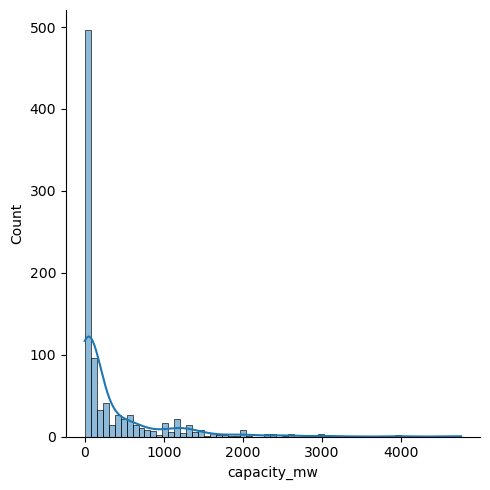

In [15]:
# Distribution of the target variable
sns.displot(df1['capacity_mw'], kde=True)
plt.show()

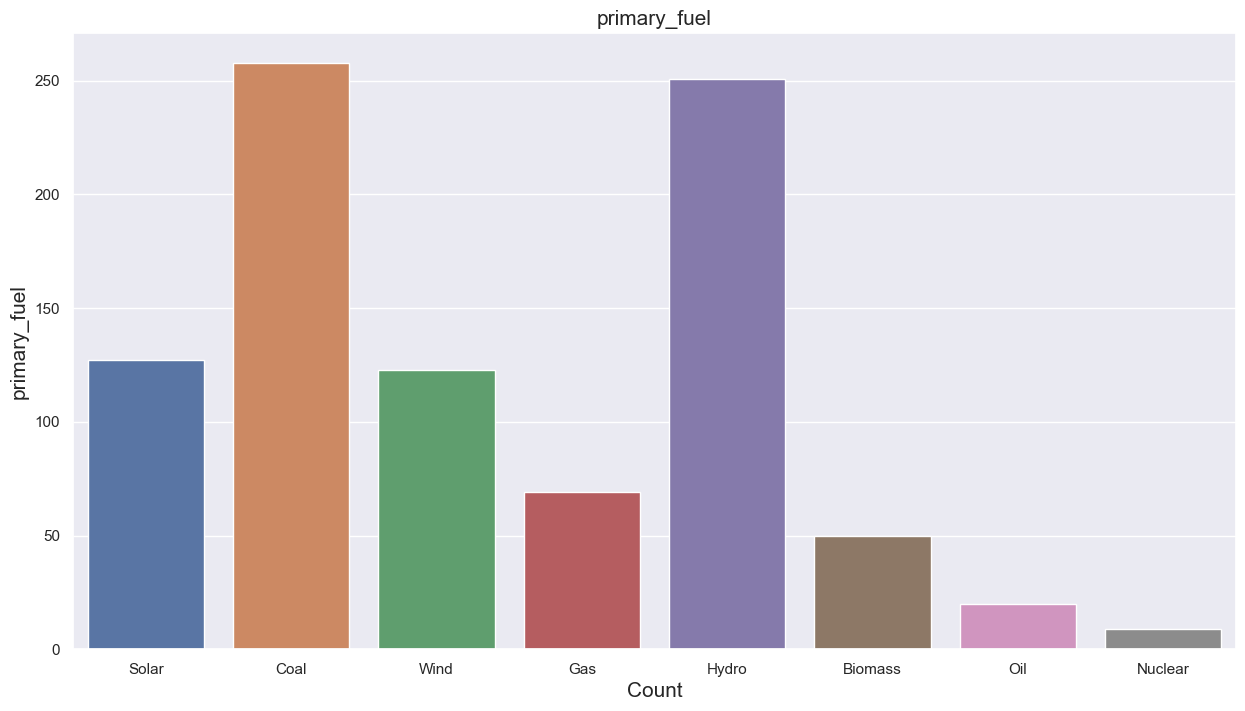

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

In [16]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,8))
sns.countplot(df1['primary_fuel'] )
plt.xlabel('Count', fontsize=15 )
plt.ylabel('primary_fuel', fontsize=15 )
plt.title('primary_fuel', fontsize=15)
plt.show()

df1['primary_fuel'].value_counts()

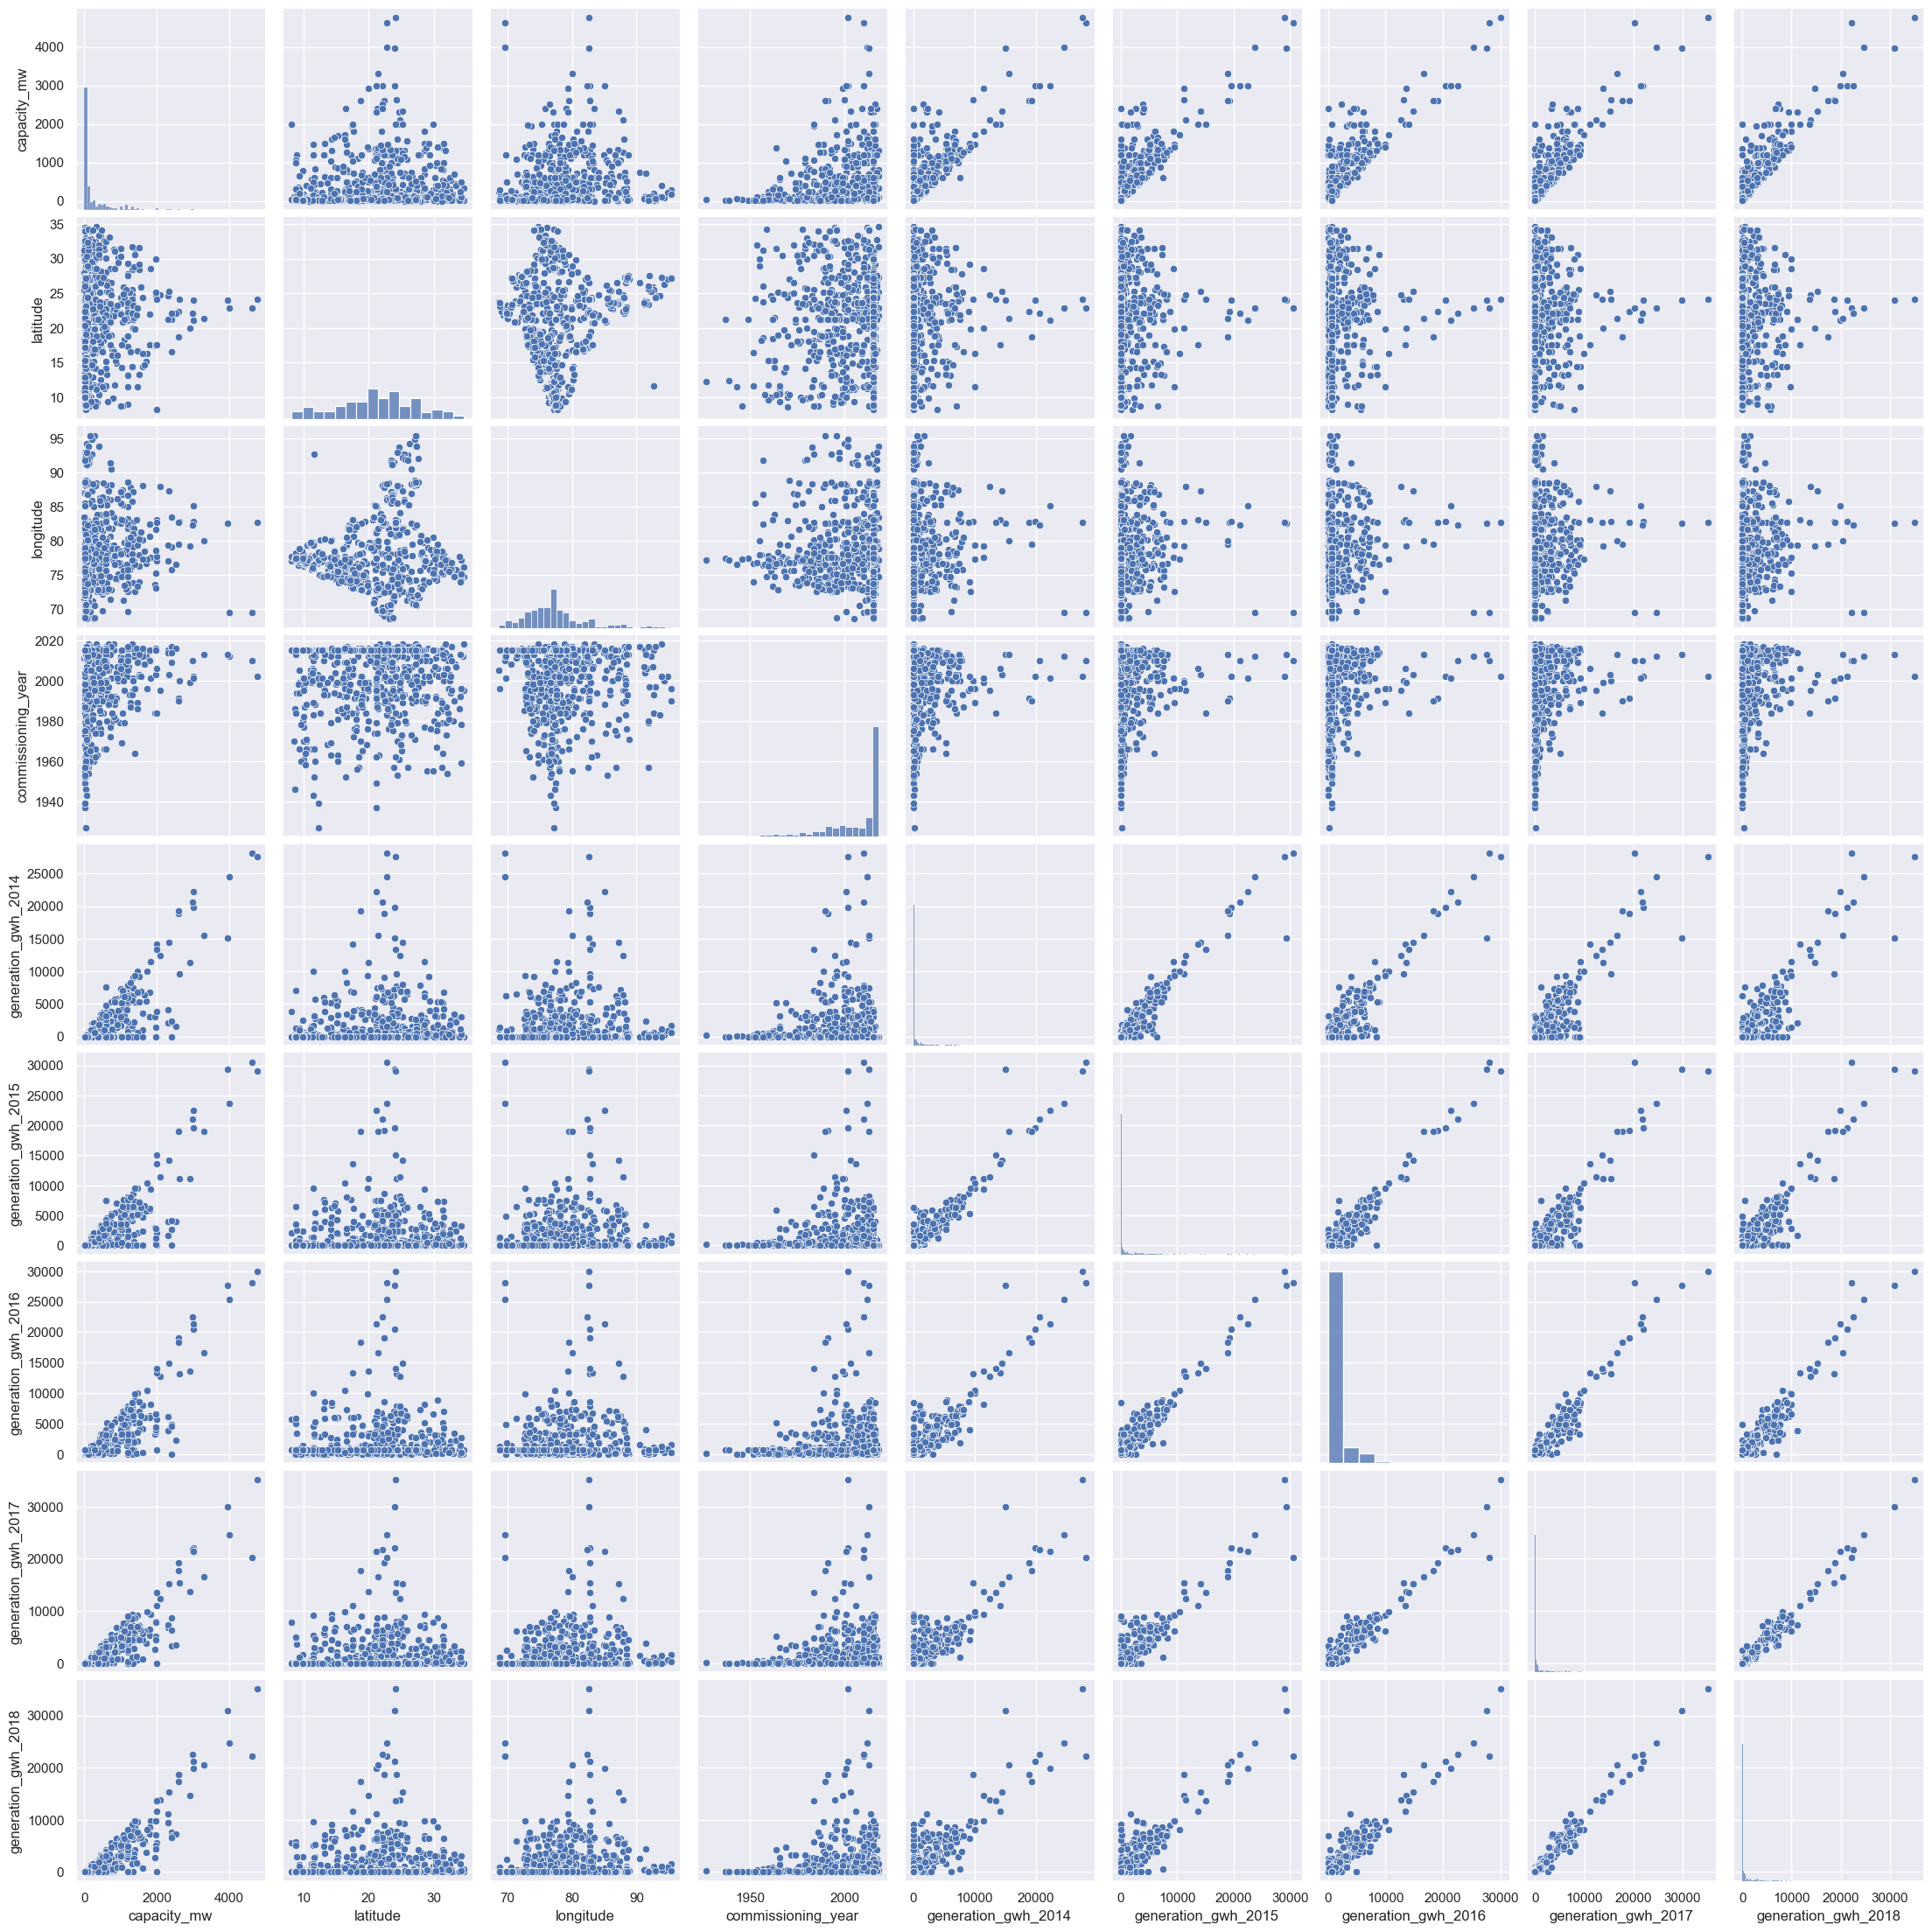

In [17]:
sns.pairplot(df1)
plt.show()

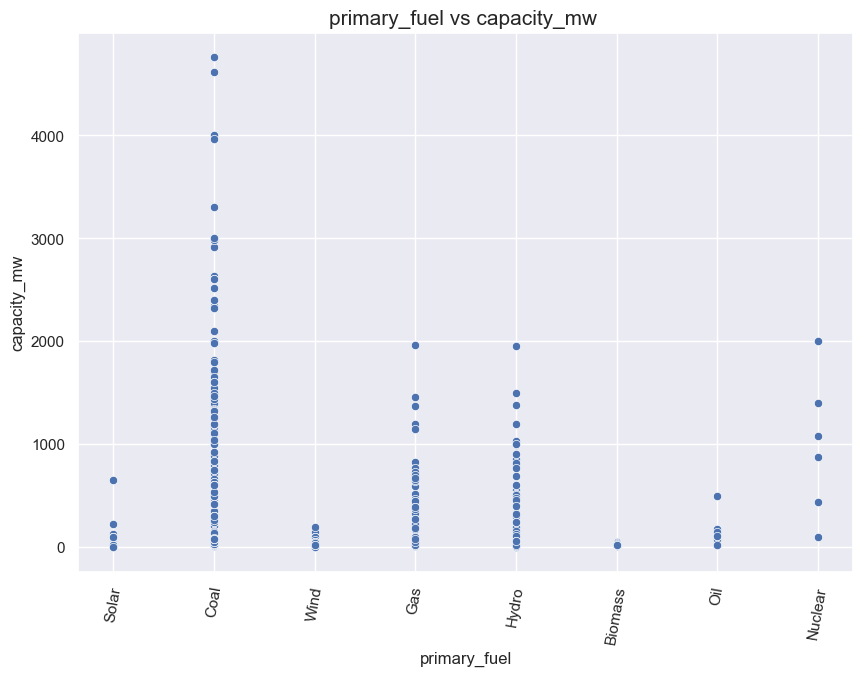

In [18]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df1, x='primary_fuel',y='capacity_mw')
locs, labels = plt.xticks()
plt.title('primary_fuel vs capacity_mw ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()

In [19]:
cat=df1.select_dtypes(include=['object'])

In [20]:
cat

,primary_fuel,other_fuel1,geolocation_source
0,Solar,Oil,National Renewable Energy Laboratory
1,Coal,Oil,WRI
2,Wind,Oil,WRI
3,Gas,Oil,WRI
4,Coal,Oil,WRI
...,...,...,...
902,Coal,Oil,WRI
903,Solar,Oil,Industry About
904,Wind,Oil,WRI
905,Coal,Oil,WRI


In [22]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
df1['other_fuel1']=le.fit_transform(df1['other_fuel1'])
df1['primary_fuel']=le.fit_transform(df1['primary_fuel'])
df1['geolocation_source']=le.fit_transform(df1['geolocation_source'])

In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             907 non-null    float64
 2   longitude            907 non-null    float64
 3   primary_fuel         907 non-null    int32  
 4   other_fuel1          907 non-null    int32  
 5   commissioning_year   907 non-null    float64
 6   geolocation_source   907 non-null    int32  
 7   generation_gwh_2014  907 non-null    float64
 8   generation_gwh_2015  907 non-null    float64
 9   generation_gwh_2016  907 non-null    float64
 10  generation_gwh_2017  907 non-null    float64
 11  generation_gwh_2018  907 non-null    float64
dtypes: float64(9), int32(3)
memory usage: 74.5 KB


In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             907 non-null    float64
 2   longitude            907 non-null    float64
 3   primary_fuel         907 non-null    int32  
 4   other_fuel1          907 non-null    int32  
 5   commissioning_year   907 non-null    float64
 6   geolocation_source   907 non-null    int32  
 7   generation_gwh_2014  907 non-null    float64
 8   generation_gwh_2015  907 non-null    float64
 9   generation_gwh_2016  907 non-null    float64
 10  generation_gwh_2017  907 non-null    float64
 11  generation_gwh_2018  907 non-null    float64
dtypes: float64(9), int32(3)
memory usage: 74.5 KB


In [33]:
from sklearn.preprocessing import power_transform

df1[['other_fuel1','generation_gwh_2016','generation_gwh_2015','generation_gwh_2017','generation_gwh_2014','generation_gwh_2018','commissioning_year','capacity_mw','geolocation_source']]=power_transform(df1[['other_fuel1','generation_gwh_2016','generation_gwh_2015','generation_gwh_2017','generation_gwh_2014','generation_gwh_2018','commissioning_year','capacity_mw','geolocation_source']],method='yeo-johnson')

In [34]:
df1.skew()

capacity_mw             0.022164
latitude               -0.149698
longitude               1.141881
primary_fuel            0.472251
other_fuel1           -17.330022
commissioning_year     -1.077695
geolocation_source     -2.132728
generation_gwh_2014     0.460708
generation_gwh_2015     0.385627
generation_gwh_2016     0.204011
generation_gwh_2017     0.334327
generation_gwh_2018     0.317200
dtype: float64

### Outlier Removal

In [35]:
z=np.abs(zscore(df1))
dfn=df1[(z<3).all(axis=1)]
dfn

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.695767,28.1839,73.2407,6,0.057607,0.358184,-2.345400,-0.813809,-0.853614,-0.050215,-0.878131,-0.883788
1,0.193694,24.7663,74.6090,1,0.057607,0.743571,0.396062,-0.813809,-0.853614,-0.050215,-0.878131,-0.883788
2,-0.292337,21.9038,69.3732,7,0.057607,0.743571,0.396062,-0.813809,-0.853614,-0.050215,-0.878131,-0.883788
3,0.360998,23.8712,91.3602,2,0.057607,-0.237119,0.396062,1.174182,1.168585,0.083178,1.069326,1.038383
4,1.649503,21.9603,82.4091,1,0.057607,0.743571,0.396062,1.380682,1.432242,1.842814,1.390376,1.420200
...,...,...,...,...,...,...,...,...,...,...,...,...
902,1.593509,16.2949,77.3568,1,0.057607,0.845530,0.396062,-0.813809,-0.523935,-0.782355,1.115671,1.055150
903,-1.615576,12.8932,78.1654,6,0.057607,0.743571,-2.530510,-0.813809,-0.853614,-0.050215,-0.878131,-0.883788
904,-0.522773,15.2758,75.5811,7,0.057607,0.743571,0.396062,-0.813809,-0.853614,-0.050215,-0.878131,-0.883788
905,0.086915,24.3500,73.7477,1,0.057607,0.743571,0.396062,-0.813809,-0.853614,-0.050215,-0.878131,-0.883788


# To find capacity mw of plant

 we will use regressor model

### Scaling of Independent features

In [36]:
X=dfn.iloc[:,1:-1]
y=dfn.iloc[:,0]
st=StandardScaler()
xf=st.fit_transform(X)
x=pd.DataFrame(data=xf, columns=X.columns)

In [37]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.33,random_state=94)
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

(587, 10) (587,)
(290, 10) (290,)


In [38]:
lr=LinearRegression()
svr=SVR()
dtr=DecisionTreeRegressor()
rfr=RandomForestRegressor()

In [39]:
model=[lr,svr,dtr,rfr]
for m in model:
    m.fit(train_x,train_y)
    m.score(train_x,train_y)
    predm=m.predict(test_x)
    print(f"Scores for {m} are")
    print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, predm))  
    print('Mean Squared Error:', metrics.mean_squared_error(test_y, predm))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, predm)))
    print('R squared score: ', r2_score(test_y, predm))
    score=cross_val_score(m,train_x,train_y,cv=5)
    print("Cross Validation Score is :",score)
    print("Mean Score :",score.mean())
    print("Difference :",score.mean()-r2_score(test_y, predm))
    print("==============================================\n\n\n====================================================")

Scores for LinearRegression() are
Mean Absolute Error: 0.4272149349057482
Mean Squared Error: 0.2855559171559321
Root Mean Squared Error: 0.5343743230694492
R squared score:  0.6948924803521046
Cross Validation Score is : [0.74341527 0.6570677  0.55422779 0.76328614 0.76347588]
Mean Score : 0.6962945560548514
Difference : 0.0014020757027467523


Scores for SVR() are
Mean Absolute Error: 0.34267109124445827
Mean Squared Error: 0.22206816466854956
Root Mean Squared Error: 0.4712410897497687
R squared score:  0.7627271478398989
Cross Validation Score is : [0.78898682 0.75778744 0.673725   0.86787461 0.81014611]
Mean Score : 0.7797039967238855
Difference : 0.01697684888398654


Scores for DecisionTreeRegressor() are
Mean Absolute Error: 0.3889485246340585
Mean Squared Error: 0.29025627829763984
Root Mean Squared Error: 0.5387543765925618
R squared score:  0.6898702922508065
Cross Validation Score is : [0.69975533 0.67794702 0.58442806 0.81376644 0.76005403]
Mean Score : 0.707190178129559
D

### HYPER PERAMETER TUNING

In [40]:
param ={
       'n_estimators':[100,200],
      'criterion':['friedman_mse','poisson'],
     'min_samples_split':[2,3],
    'min_samples_leaf':[1,2],
}

In [43]:
RF_grid=GridSearchCV(RandomForestRegressor(),param,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

RF_grid.fit(train_x,train_y)
RF_grid_PRED=RF_grid.best_estimator_.predict(test_x)

RF_grid.best_params_

Fitting 4 folds for each of 16 candidates, totalling 64 fits


{'criterion': 'friedman_mse',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

### Preparing model with best parameters.

In [45]:
rfr_final = sklearn.ensemble.RandomForestRegressor(n_estimators=100,criterion='friedman_mse',min_samples_split=2,min_samples_leaf=1)

rfr_final.fit(train_x,train_y)
rfr_final.score(train_x,train_y)
pred_final=rfr_final.predict(test_x)

print('R squared score: ', r2_score(pred_final,test_y))
score=cross_val_score(rfr_final,train_x,train_y,cv=5)
print("Cross Validation Score is :",score)
print("Mean Score :",score.mean())
print("Difference :",score.mean()-r2_score(pred_final,test_y))

R squared score:  0.7483704624579353
Cross Validation Score is : [0.82797586 0.78774926 0.67418085 0.85996889 0.83717023]
Mean Score : 0.7974090161514944
Difference : 0.04903855369355914


In [46]:
sns.distplot(pred_final-test_y)

<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

In [47]:
plt.scatter(pred_final,test_y)
plt.plot(test_y,test_y,linewidth=4,color='Red')

### Saving The Model

In [48]:
import joblib
joblib.dump(rfr_final,'capacity_rfr.obj')

['capacity_rfr.obj']

# To find primary fuel
we will use classifier model

In [51]:
Xc=dfn.drop("primary_fuel",axis=1)
yc=dfn["primary_fuel"]
st=StandardScaler()
xfc=st.fit_transform(Xc)
xc=pd.DataFrame(data=xfc, columns=Xc.columns)

In [54]:
# Split 80-20 train vs test data
train_x,test_x,train_y,test_y=train_test_split(xc,yc,test_size=0.25,random_state=94)

In [55]:
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

(657, 11) (657,)
(220, 11) (220,)


In [56]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()

In [57]:
model=[lg,gnb,svc,dtc,knn]
for m in model:
    m.fit(train_x,train_y)
    m.score(train_x,train_y)
    predm=m.predict(test_x)
    print("accuracy score for ",m,"is : ",accuracy_score(test_y,predm),"\n",confusion_matrix(test_y,predm),"\n",classification_report(test_y,predm),"\n")
    sns.heatmap(confusion_matrix(test_y,predm),annot=True)
    score=cross_val_score(m,train_x,train_y,cv=5)
    print("Cross Validation Score is :",score)
    print("Mean Score :",score.mean())
    print("==============================================\n\n\n====================================================")

accuracy score for  LogisticRegression() is :  0.740909090909091 
 [[ 0  2  0  0  0  0  0  9]
 [ 0 47  2  6  0  0  0  3]
 [ 0  5  3  7  0  1  0  2]
 [ 0  9  0 58  0  0  0  0]
 [ 0  1  1  2  0  0  0  0]
 [ 0  0  0  1  0  0  0  3]
 [ 0  1  0  0  0  0 26  0]
 [ 0  2  0  0  0  0  0 29]] 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.70      0.81      0.75        58
           2       0.50      0.17      0.25        18
           3       0.78      0.87      0.82        67
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         4
           6       1.00      0.96      0.98        27
           7       0.63      0.94      0.75        31

    accuracy                           0.74       220
   macro avg       0.45      0.47      0.44       220
weighted avg       0.68      0.74      0.70       220
 

Cross Validation Score is : [0.77272727 0.66666667 0.69465649

In [58]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

rfc.fit(train_x,train_y)
print(rfc.score(train_x,train_y))
rfc_PRED=rfc.predict(test_x)

print("accuracy score for is : ",accuracy_score(test_y,rfc_PRED),"\n",confusion_matrix(test_y,rfc_PRED),"\n",classification_report(test_y,rfc_PRED),"\n")
score=cross_val_score(rfc,train_x,train_y,cv=5)
print("Cross Validation Score is :",score)
print("Mean Score :",score.mean())

1.0
accuracy score for is :  0.8272727272727273 
 [[ 8  2  0  0  0  0  0  1]
 [ 1 52  0  3  0  0  0  2]
 [ 0  8  8  2  0  0  0  0]
 [ 0  7  0 60  0  0  0  0]
 [ 0  3  0  0  0  1  0  0]
 [ 0  0  2  1  0  1  0  0]
 [ 0  0  0  0  0  0 26  1]
 [ 2  2  0  0  0  0  0 27]] 
               precision    recall  f1-score   support

           0       0.73      0.73      0.73        11
           1       0.70      0.90      0.79        58
           2       0.80      0.44      0.57        18
           3       0.91      0.90      0.90        67
           4       0.00      0.00      0.00         4
           5       0.50      0.25      0.33         4
           6       1.00      0.96      0.98        27
           7       0.87      0.87      0.87        31

    accuracy                           0.83       220
   macro avg       0.69      0.63      0.65       220
weighted avg       0.82      0.83      0.81       220
 

Cross Validation Score is : [0.81060606 0.82575758 0.83206107 0.80916031 0.793

In [62]:
rf=RandomForestClassifier()
dict2={"random_state":[50,100,200],"criterion":['gini', 'entropy',],"min_samples_split":[2,3]}
gv=GridSearchCV(rf,dict2, refit=True)
gv.fit(train_x,train_y)
gv.best_params_

{'criterion': 'gini', 'min_samples_split': 3, 'random_state': 200}

In [64]:
rf1=RandomForestClassifier(criterion='gini', min_samples_split= 3, random_state= 200)
rf1.fit(train_x,train_y)
prf=rf1.predict(test_x)
print(accuracy_score(test_y,prf))
score=cross_val_score(m,train_x,train_y,cv=4)
print("Cross Validation Score is :",score)
print("Mean Score :",score.mean())

0.8090909090909091
Cross Validation Score is : [0.73939394 0.79878049 0.76219512 0.81707317]
Mean Score : 0.779360679970436


In [65]:
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr,tpr,thresholds=metrics.roc_curve(test_y,prf,pos_label=2)
#fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=2)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr)

In [66]:
import joblib
joblib.dump(rf1,"primary_fuel_rfc.obj")

['primary_fuel_rfc.obj']

In [67]:
rfr=joblib.load('primary_fuel_rfc.obj')